- Handwritten digit recognition is a foundational task in the fields of machine learning and computer vision.
- It focuses on identifying numerical digits (0–9) written by hand from scanned or digital images.
- This problem is often treated as a benchmark to test and compare the performance of various machine learning algorithms, particularly neural networks, because of its straightforward nature and practical relevance in areas like postal sorting, document digitization, and bank cheque verification.

**Step 1: Import Libraries**

- To begin, we import the core Python libraries required for data handling, visualization, and model creation.
- In this project, we utilize NumPy for numerical operations, Matplotlib for plotting, Scikit-Learn for data preprocessing and splitting, and TensorFlow for building and training our neural network model.

In [1]:
# For numerical operations and array handling
import numpy as np

# For loading, analyzing, and processing datasets
import pandas as pd

# For data visualization (plots and graphs)
import matplotlib.pyplot as plt

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For creating a sequential neural network model
from tensorflow.keras.models import Sequential

# For defining neural network layers (Flatten, Dense)
from tensorflow.keras.layers import Dense, Flatten

# For converting labels into one-hot encoded format
from tensorflow.keras.utils import to_categorical

2025-10-22 06:26:09.235807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761114369.501089      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761114369.579555      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Step 2: Load and Explore the Dataset**

The dataset is first loaded and examined to understand its structure and composition.  
It contains around **42,000 samples**, where each sample represents a single handwritten digit image.  

- The **first column** corresponds to the **label** (digits ranging from 0 to 9).  
- The **remaining 784 columns** store the **pixel intensity values** of a 28×28 grayscale image.  
- These are separated into two components:  
  - **X** → pixel values (features)  
  - **y** → digit labels (targets)

As a result, **X** holds 42,000 records with 784 features, while **y** contains the 42,000 associated class labels used for model training.




In [4]:
# Load the training dataset from the given Kaggle path
train_data = pd.read_csv('/kaggle/input/training-dataset/Train.csv')

# Display the total number of rows and columns in the dataset
print("Shape of train_data:", train_data.shape)

# Separate all columns except the first one as input features (pixels)
X = train_data.iloc[:, 1:]  

# Select the first column as the target variable (digit labels)
y = train_data.iloc[:, 0]   

# Show the shape of feature data after separation
print("Shape of X after separating features:", X.shape)


Shape of train_data: (42000, 785)
Shape of X after separating features: (42000, 784)


After loading and inspecting the dataset, the following shapes are observed.

- Shape of train_data: (42000, 785)  
  This means there are 42,000 samples and 785 columns, which include one label column and 784 pixel value columns.

- Shape of X after separating features: (42000, 784)  
  Only the pixel values are retained as input features after removing the label column.


**Step 3: Preprocess the Data**

Raw data often requires cleaning and formatting before it can be used by a neural network.  
In this step, the data is preprocessed to make it suitable for training.

- Ensure that X is properly structured as a Pandas DataFrame.  
- Convert all pixel values to numeric form and replace any missing entries with zero.  
- Normalize the pixel intensities to the range [0, 1] by dividing each value by 255.0 to improve model training speed and stability.  
- Reshape the data to include a single channel dimension so that it matches the expected input shape for neural networks.


In [5]:
# Ensure X is a pandas DataFrame before processing
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

# Convert all values to numeric type; replace non-numeric with NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Replace any NaN values with 0
X = X.fillna(0)

# Normalize pixel values to range [0, 1] for faster model convergence
X = X.values / 255.0

# Reshape data into 28x28 grayscale images with 1 channel
X = X.reshape(-1, 28, 28, 1)

# Display the new shape of the feature set
print("Shape of X after reshaping:", X.shape)


Shape of X after reshaping: (42000, 28, 28, 1)


After preprocessing and reshaping, the feature data has the following shape:

Shape of X after reshaping: (42000, 28, 28, 1)  
This indicates that there are 42,000 images, each represented as a 28 by 28 pixel grid with a single grayscale channel.


**Step 4: One-Hot Encode the Labels**

- Neural networks perform better when the target labels are represented in a format known as one-hot encoding.  
- In this step, the labels are converted into one-hot encoded vectors so that each digit is represented as a binary vector instead of a single number.


In [6]:
# Convert digit labels into one-hot encoded vectors (e.g., 3 → [0,0,0,1,0,0,0,0,0,0])
y = to_categorical(y, num_classes=10)

# Show the new shape of the target labels after encoding
print("Shape of y after one-hot encoding:", y.shape)


Shape of y after one-hot encoding: (42000, 10)


- After converting the labels into one-hot encoded format, their shape becomes:
- Shape of y after one-hot encoding: (42000, 10)  
- This shows that there are 42,000 samples and 10 output classes, one for each digit from 0 to 9.


**Step 5: Split the Data**

- To properly evaluate the model, the dataset is divided into two parts: a training set and a validation set.  
- This helps in testing how well the model generalizes to unseen data.  
- Here, 80 percent of the data is used for training, and the remaining 20 percent is kept aside for validation.


In [7]:
# Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training feature set
print("X_train shape:", X_train.shape)


X_train shape: (33600, 28, 28, 1)


After splitting the dataset, the shape of the training feature set is:

- X_train shape: (33600, 28, 28, 1)  
- This indicates that 33,600 images are used for training, each of size 28 by 28 pixels with one grayscale channel.


**Step 6: Build the Neural Network Model**


A simple feedforward neural network is created with three main layers.

- The Flatten layer converts each 28x28 image into a one-dimensional vector of length 784.  
- Two hidden layers with 128 and 64 neurons use the ReLU activation function to introduce non-linearity and help the model learn complex patterns.  
- The output layer has 10 neurons with the softmax activation function, which outputs probability values for each digit from 0 to 9.

The model is compiled using the Adam optimizer, categorical cross-entropy as the loss function, and accuracy as the evaluation metric.


In [9]:
# Import necessary modules for building a sequential neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

# Define a simple feedforward neural network for digit classification
model = Sequential([
    Input(shape=(28, 28, 1)),       # Input layer for 28x28 grayscale images
    Flatten(),                      # Flatten 2D image into 1D vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer for 10 digit classes
])

# Compile the model with optimizer, loss function, and evaluation metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture summary
model.summary()

2025-10-22 06:37:24.369347: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

- The neural network is a sequential model consisting of four layers.  
- The first layer is a Flatten layer that converts each 28x28 image into a one-dimensional array of 784 values.  
- This is followed by two Dense (fully connected) layers — the first with 128 neurons and the second with 64 neurons, both using the ReLU activation function.  
- The final output layer contains 10 neurons, each representing one of the digit classes from 0 to 9, and uses the softmax activation function to output class probabilities.  
- In total, the model has about 109,386 trainable parameters.  
- All parameters are trainable, and no non-trainable parameters are present.

**Step 7: Train the Model**

- With the model architecture defined, the next step is to train it using the training dataset.  
- The model is trained for 10 epochs, meaning it goes through the entire training data 10 times.  
- During each epoch, the data is processed in batches of 32 samples to make the training more efficient and memory-friendly.


In [10]:
# Train the model on training data for 10 epochs using a batch size of 32
# Also validate performance on the validation set after each epoch
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8435 - loss: 0.5398 - val_accuracy: 0.9460 - val_loss: 0.1760
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9611 - loss: 0.1308 - val_accuracy: 0.9623 - val_loss: 0.1185
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9733 - loss: 0.0848 - val_accuracy: 0.9655 - val_loss: 0.1114
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9799 - loss: 0.0624 - val_accuracy: 0.9676 - val_loss: 0.1022
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9858 - loss: 0.0469 - val_accuracy: 0.9689 - val_loss: 0.1022
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9894 - loss: 0.0338 - val_accuracy: 0.9686 - val_loss: 0.1080
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9919 - loss: 0.0285 - val_accuracy: 0.9696 - val_loss: 0.1132
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9916 - loss: 0.0276 - 

- The model was trained for 10 epochs.  
- During each epoch, the training and validation accuracy steadily improved while the loss decreased, showing that the model was learning effectively.
- By the final epoch, the training accuracy reached approximately 99%, and the validation accuracy was around 97%.
- This indicates that the neural network generalized well to unseen data and achieved strong performance on the validation set.


**Step 8: Evaluate the Model**

- Once training is completed, the model is evaluated on the validation dataset.  
- This evaluation helps to check how well the model performs on unseen data.  
- The validation accuracy and loss are recorded to measure model performance.  
- Training and validation accuracy values are plotted across epochs.  
- The plot helps identify if the model is overfitting or underfitting the data.


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.1352
Validation Accuracy: 97.07%


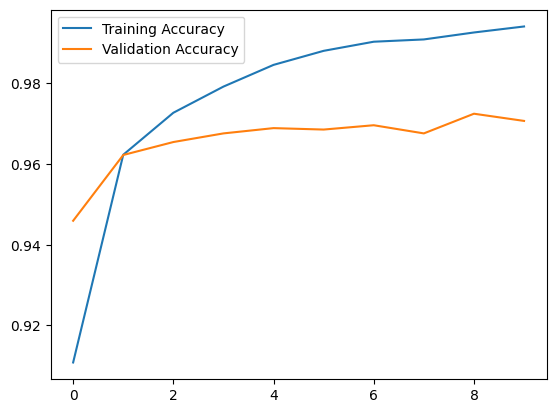

In [11]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Print validation accuracy as a percentage with two decimal places
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot validation accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add legend to differentiate the two curves
plt.legend()

# Display the accuracy plot
plt.show()


- The blue line represents the training accuracy which consistently increases over the training steps while the orange line represents the validation accuracy which fluctuates slightly but shows a positive trend.
- By the end of the training the model achieves a training accuracy of around 96.81% and a validation accuracy of 97.13% indicating the model performs well on both training and validation data suggesting good generalization capability.

**Step 9: Make Predictions**

- The trained model is now used to make predictions on unseen test data.  
- The test dataset is loaded and preprocessed in the same way as the training data.  
- Each image is normalized and reshaped to match the model’s input format.  
- The processed test data is then passed into the trained model to generate predictions.  
- The predicted output represents the digit class (0–9) for each test image.


175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


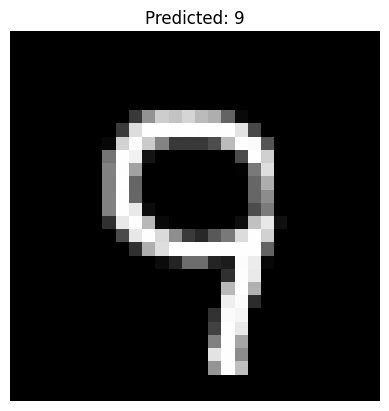

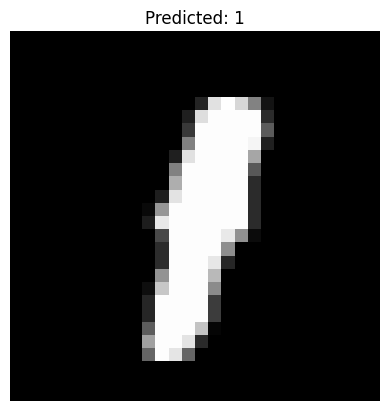

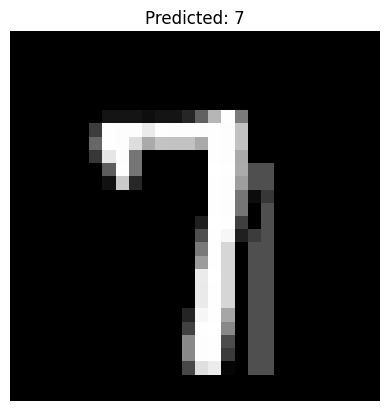

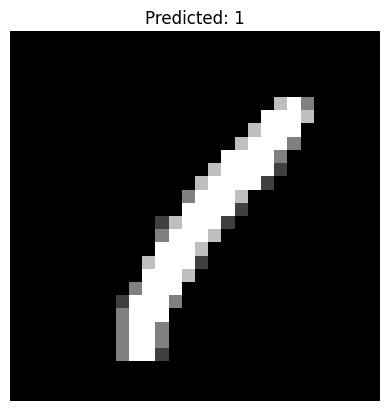

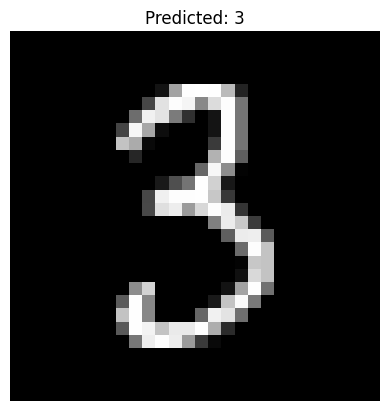

In [13]:
# Load the test dataset from the given Kaggle input path
test_data = pd.read_csv('/kaggle/input/test-data/test.csv')

# Normalize pixel values to range [0,1]
X_test = test_data.values / 255.0

# Reshape test images into 28x28 grayscale format with one channel
X_test = X_test.reshape(-1, 28, 28, 1)

# Use the trained model to predict class probabilities for all test samples
predictions = model.predict(X_test)

# Convert probabilities to class labels (digit with highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Display the first 5 test images with their predicted labels
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')      # show grayscale image
    plt.title(f"Predicted: {predicted_labels[i]}")          # show predicted digit
    plt.axis('off')                                         # hide axes for clarity
    plt.show()                                              # render the image


- The neural network model performed well and produced accurate predictions on unseen data.  
- Using a simple feedforward neural network, the model was trained on a dataset of 42,000 handwritten digit images.  
- It achieved high accuracy and demonstrated good generalization to new samples.  
- The experiment highlights how neural networks can effectively handle image recognition tasks.  
- This project shows the practical value of machine learning techniques in solving real-world problems related to pattern and image recognition.
